# Task 4.9: Intro to Data Visualization with Python, part 2

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [3]:
# Set a PATH variable.

In [4]:
# Linux PATH - Sadly, my Linux system with 8GB of total RAM could not import the new df_ords_prior DataFrame.
# BUT, now I have moved again, to an AWS EC2 instance that should be able to handle this.

In [5]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [6]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

In [7]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM, so I migrated there.

In [8]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

## Step 1:   Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [9]:
# Standard library import and path set up, above.  Now to import the latest version of our data set,
# containing customer, order, and product data.

In [10]:
cust_ords_prods_merge = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'cust_ords_prods_merge.pkl'))

In [11]:
cust_ords_prods_merge.shape

(32404859, 35)

In [12]:
# Adding "memory_usage = 'deep'" takes more time and gives a much larger estimate of RAM usage:  34.2GB vs. 8GB.
# We'll see whether the larger number is truly accurate, but I know it's at least about double the 8GB estimate.

In [13]:
cust_ords_prods_merge.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int64   
 1   product_id              int64   
 2   product_name            object  
 3   aisle_id                int64   
 4   department_id           int64   
 5   prices                  float64 
 6   order_id                int64   
 7   customer_id             int64   
 8   order_number            int64   
 9   orders_day_of_week      int64   
 10  order_hour_of_day       int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  _merge                  category
 15  _merge2                 category
 16  price_range             object  
 17  price_range_loc         object  
 18  busiest_days            object  
 19  busiest_hours           object  
 20  max_order               int64   
 21  loyalt

In [14]:
cust_ords_prods_merge.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,...,frequency_flag,given_name,family_name,gender,state,age,date_joined,num_dependents,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,1000,Apricots,18,10,12.9,505689,138,9,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## Step 2:  If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

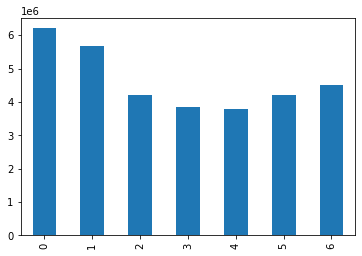

In [15]:
bar_all = cust_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [16]:
bar_all.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'bar_all_orders_dow.png'))

Text(0, 0.5, 'Order Frequency')

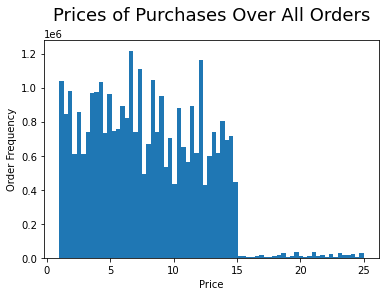

In [21]:
histogram_all = cust_ords_prods_merge['prices'].plot.hist(bins = 70)
plt.title('Prices of Purchases Over All Orders', fontsize = 18, pad=20)
plt.xlabel('Price')
plt.ylabel('Order Frequency')

In [22]:
histogram_all.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'histogram_all_prices.png'), facecolor='white')

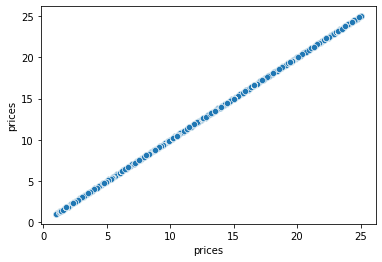

In [20]:
scatterplot_all = sns.scatterplot(x = 'prices', y = 'prices',data = cust_ords_prods_merge)

In [20]:
scatterplot_all.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'scatterplot_all_prices.png'))

In [21]:
# For the line charfts, I'll start with a 70/30 split for sampling.
# I'll use '4' for my random seed, as in the Exercise; perhaps it is a popular number to choose?
# 
# First, we use a seed of 4 for supposed reproducibility.
# Then, we will produce a list of randomized values between 0 and 1, for
# which the value is True if it is less than or equal to 0.7 and False if
# it is not.  This gives us a distribution of 70% True and 30% False.
# The list contains the same number of values as our DataFrame has rows.

In [22]:
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods_merge)) <= 0.7

In [23]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [24]:
# Combine the list of randomized True/False values with our DataFrame,
# storing 70% of the DataFrame (where the row is associated with 'True')
# in a new DF called, 'big'...

In [25]:
big = cust_ords_prods_merge[dev]

In [26]:
# ...while storing the remaining 30% of our DataFrame (the rows associated)
# with 'False') in a new DF called, 'small'.

In [27]:
small = cust_ords_prods_merge[~dev]

## Remember how a tilde (~) is used to represent 'NOT', rather than a bang (!).  Hooray for Python.
### I wonder if this has anything to do with the matplotlib.pyplot.savefig function not handling tildes in the file path as expected.

In [28]:
# Let's check out the new DataFrames.

In [29]:
big.describe()

,Unnamed: 0,product_id,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_order,avg_order_frequency,age,num_dependents,income
count,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268018e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07,2.268376e+07
mean,2.560014e+04,2.559844e+04,7.120029e+01,9.921023e+00,7.790759e+00,1.710901e+06,1.029381e+05,1.714296e+01,2.739048e+00,1.342535e+01,1.039194e+01,8.352656e+00,5.896000e-01,3.305403e+01,1.197704e+01,1.039239e+01,4.946619e+01,1.501875e+00,9.943438e+04
std,1.408587e+04,1.408432e+04,3.821014e+01,6.281597e+00,4.241575e+00,9.872423e+05,5.946143e+04,1.753497e+01,2.090113e+00,4.247224e+00,8.917624e+00,7.127245e+00,4.919063e-01,2.515524e+01,8.352866e+01,5.023575e+00,1.848517e+01,1.118916e+00,4.304513e+04
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354200e+04,1.354200e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.561000e+05,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387500e+00,6.585009e+00,3.300000e+01,1.000000e+00,6.700800e+04
50%,2.530100e+04,2.530000e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711197e+06,1.026190e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824806e+00,9.350515e+00,4.900000e+01,2.000000e+00,9.660800e+04
75%,3.795100e+04,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565522e+06,1.543870e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254241e+00,1.359375e+01,6.500000e+01,3.000000e+00,1.279020e+05
max,4.969200e+04,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,2.970297e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [30]:
small.describe()

,Unnamed: 0,product_id,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_order,avg_order_frequency,age,num_dependents,income
count,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.719552e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06
mean,2.560089e+04,2.559919e+04,7.118637e+01,9.916921e+00,7.791543e+00,1.710382e+06,1.029353e+05,1.714078e+01,2.738444e+00,1.342467e+01,1.039437e+01,8.352290e+00,5.895577e-01,3.304783e+01,1.198767e+01,1.039332e+01,4.946312e+01,1.501945e+00,9.944555e+04
std,1.408480e+04,1.408325e+04,3.821429e+01,6.281223e+00,4.242356e+00,9.874306e+05,5.947701e+04,1.753615e+01,2.089993e+00,4.244412e+00,8.918294e+00,7.126665e+00,4.919141e-01,2.515526e+01,8.257014e+01,5.024918e+00,1.848655e+01,1.118746e+00,4.308561e+04
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.555800e+05,5.139700e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.386957e+00,6.585153e+00,3.300000e+01,1.000000e+00,6.699100e+04
50%,2.531000e+04,2.530900e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710702e+06,1.025990e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824688e+00,9.352550e+00,4.900000e+01,2.000000e+00,9.663000e+04
75%,3.795100e+04,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565431e+06,1.543980e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.253789e+00,1.359589e+01,6.500000e+01,3.000000e+00,1.279160e+05
max,4.969200e+04,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.430000e+02,1.000000e+00,9.900000e+01,1.500694e+04,2.970297e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [31]:
# Wow, the describe() outputs for the two new DFs look close to identical outside of their counts.  Sampling works!

In [32]:
# More sanity checking, suggested by the Exercise, but with a one-liner to compare them mathematically.

In [33]:
len(cust_ords_prods_merge) - (len(big) + len(small))

0

In [34]:
# As suggested, speed processing up further by looking only at those columns actually needed for our chart.

In [35]:
df_2 = small[['orders_day_of_week','prices']]

In [36]:
# Sanity-checks.

In [37]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,5,20.0
3,5,20.0
6,5,4.4
10,0,12.8


In [38]:
df_2.describe()

,orders_day_of_week,prices
count,9.721098e+06,9.719552e+06
mean,2.738444e+00,7.791543e+00
std,2.089993e+00,4.242356e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column              Dtype  
---  ------              -----  
 0   orders_day_of_week  int64  
 1   prices              float64
dtypes: float64(1), int64(1)
memory usage: 222.5 MB


In [40]:
df_2.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column              Dtype  
---  ------              -----  
 0   orders_day_of_week  int64  
 1   prices              float64
dtypes: float64(1), int64(1)
memory usage: 222.5 MB


In [41]:
len(small) - len(df_2)

0

In [42]:
# Now, finally, the line plot, using our optimized DataFrame, 'df_2':
# NB:  I still have 'order_dow' for a column name, rather than the 'orders_day_of_week' that the Exercise uses.
# UPDATE:  YES, I MESSED UP IN PREVIOUS SCRIPTS AND RELOADED THE ORIGINAL, NON-WRANGLED orders.csv.  I am fixing this all now.

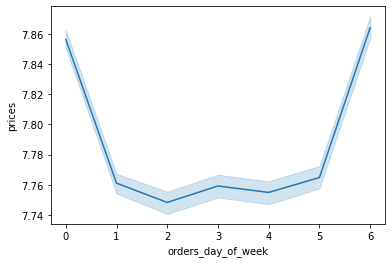

In [43]:
line_df_30 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [44]:
# The line graph for the 30% sample, above, took nearly 2.5 minutes, and peaked Python at 82% usage of OS memory,
# on an EC2 instance with 32GB of RAM, and I did have one kernel die earlier, so I'm not going to try graphing
# the 70% sample.

In [45]:
line_df_30.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'line_plot_dow_vs_price_sample_30.png'))

## Step 3:  You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

    In a markdown cell beneath your histogram, describe what the histogram demonstrates.


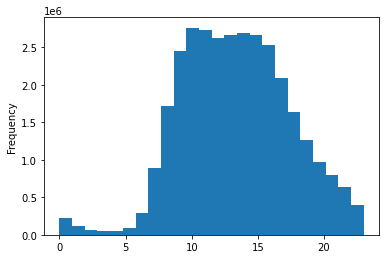

In [46]:
hist_order_hour_of_day = cust_ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

In [47]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'hist_order_hour_of_day.png'))

### The histogram above shows the number of orders (in millions) placed during each hour of the day.

## Step 4:  The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

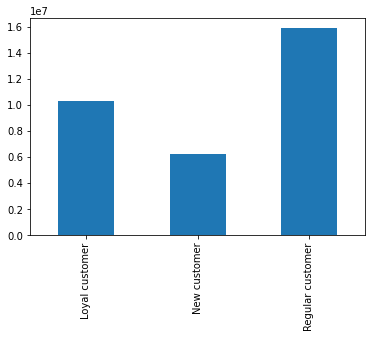

In [48]:
loyalty_bar_all = cust_ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

### We can see that most customers fall into the category of 'Regular customer'.

In [49]:
loyalty_bar_all.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'loyalty_bar_all.png'))

## Step 5:  Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [50]:
# Create a new dataframe with only the columns we need.

In [51]:
df_order_hour_of_day_vs_prices = small[['order_hour_of_day','prices']]

In [52]:
# Sanity checks.

In [53]:
df_order_hour_of_day_vs_prices.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 480.5 MB


In [54]:
df_order_hour_of_day_vs_prices.head()

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


In [55]:
df_order_hour_of_day_vs_prices.describe()

,order_hour_of_day,prices
count,9.721098e+06,9.719552e+06
mean,1.342467e+01,7.791543e+00
std,4.244412e+00,4.242356e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+01,4.200000e+00
50%,1.300000e+01,7.400000e+00
75%,1.600000e+01,1.130000e+01
max,2.300000e+01,2.500000e+01


In [56]:
len(small) - len(df_order_hour_of_day_vs_prices)

0

Text(0.5, 1.0, 'Prices of Purchases by Hour of Day')

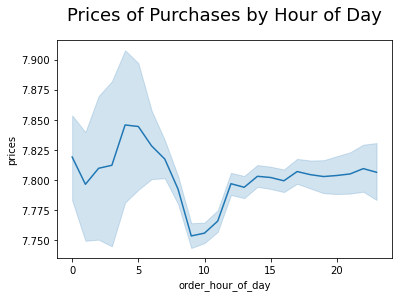

In [57]:
line_df_order_hour_of_day_vs_prices_30 = sns.lineplot(data = df_order_hour_of_day_vs_prices, x = 'order_hour_of_day',y = 'prices')
plt.title('Prices of Purchases by Hour of Day', fontsize = 18, pad=20)

In [58]:
line_df_order_hour_of_day_vs_prices_30.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'line_df_order_hour_of_day_vs_prices_30.png'), facecolor='white')

## Step 6:  Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

    In a markdown cell beneath your line chart, describe what the line chart shows.


In [59]:
# Create a new dataframe with only the columns we need.

In [60]:
df_cust_age_vs_dependents = small[['age','num_dependents']]

In [61]:
# Sanity checks.

In [62]:
df_cust_age_vs_dependents.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column          Dtype
---  ------          -----
 0   age             int64
 1   num_dependents  int64
dtypes: int64(2)
memory usage: 480.5 MB


In [63]:
df_cust_age_vs_dependents.head()

,age,num_dependents
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


In [64]:
df_cust_age_vs_dependents.describe()

,age,num_dependents
count,9.721098e+06,9.721098e+06
mean,4.946312e+01,1.501945e+00
std,1.848655e+01,1.118746e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


In [65]:
len(small) - len(df_cust_age_vs_dependents)

0

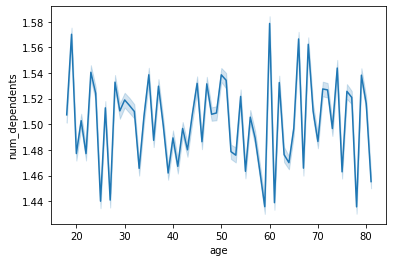

In [66]:
line_df_cust_age_vs_dependents_30 = sns.lineplot(data = df_cust_age_vs_dependents, x = 'age',y = 'num_dependents')

### The line chart above graphs customers' number of dependents vs. customer age.  No relationship is immediately clear.

In [67]:
line_df_cust_age_vs_dependents_30.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'line_df_cust_age_vs_dependents_30.png'))

## Step 7:  You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

    In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [68]:
# Create a new dataframe with only the columns we need.

In [69]:
df_cust_age_vs_income = small[['age','income']]

In [70]:
# Sanity checks.

In [71]:
df_cust_age_vs_income.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 480.5 MB


In [72]:
df_cust_age_vs_income.head()

,age,income
0,81,49620
2,81,49620
3,81,49620
6,81,49620
10,81,49620


In [73]:
df_cust_age_vs_income.describe()

,age,income
count,9.721098e+06,9.721098e+06
mean,4.946312e+01,9.944555e+04
std,1.848655e+01,4.308561e+04
min,1.800000e+01,2.590300e+04
25%,3.300000e+01,6.699100e+04
50%,4.900000e+01,9.663000e+04
75%,6.500000e+01,1.279160e+05
max,8.100000e+01,5.939010e+05


In [74]:
len(small) - len(df_cust_age_vs_income)

0

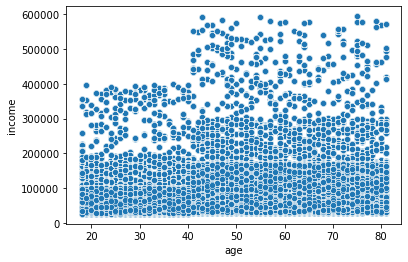

In [75]:
scatterplot_df_cust_age_vs_income_30 = sns.scatterplot(x = 'age', y = 'income',data = df_cust_age_vs_income)

### This scatterplot of income vs. age appears to show a marked increase in incomes for customers over the age of forty.

In [76]:
scatterplot_df_cust_age_vs_income_30.figure.savefig(os.path.join(path, '04-Analysis','Visualizations', 'scatterplot_df_cust_age_vs_income_30.png'))

## Step 8:  Export your visualizations as “.png” files in your relevant project folder.

In [77]:
# Already done at each step, above.  Just habit.